<a href="https://colab.research.google.com/github/ViktorMyronenko/PythonAI-ITStep/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

Дані про ціни вживаних автомобілів у Індії
* car_name - назва авто у форматі 'рік компанія основна назва'
* registration_year - місяць та рік реєстрації
* ownsership - кількість власників у форматі 'Second owner'
* transmission - тип коробки передач
* insurance_validity - тип страховки
* fuel_type - вид палива
* seats - кількість сидінь
* kms_driven - пробіг
* manufacturing_year - рік виробництва, має тип object, потрібно застосувати astype(int)
* mileage(kmpl) - скільки кілометрів проїде за літр палива
* engine(cc) - об'єм двигуна у мл
* max_power(bhp) - потужність у кінських силах
* torque(Nm) - крутний момент двигуна
* price(in lakhs) - ціна у сто тисяч рупій

[Повний аналіз даних](https://www.kaggle.com/code/abdelrasoul/used-cars-prices-prediction)

In [118]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [119]:
# df = df[['fuel_type', 'kms_driven', 'engine(cc)', 'price(in lakhs)']]
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


# Завдання 1
Виведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини

<Axes: >

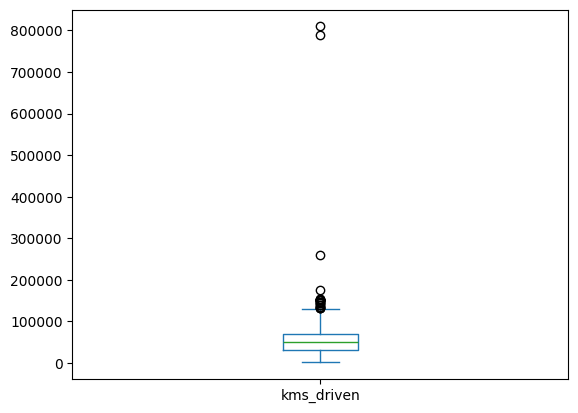

In [120]:
df['kms_driven'].plot(kind='box')

In [121]:
mask1 = df['kms_driven'] < 300_000
df = df[mask1]

<Axes: >

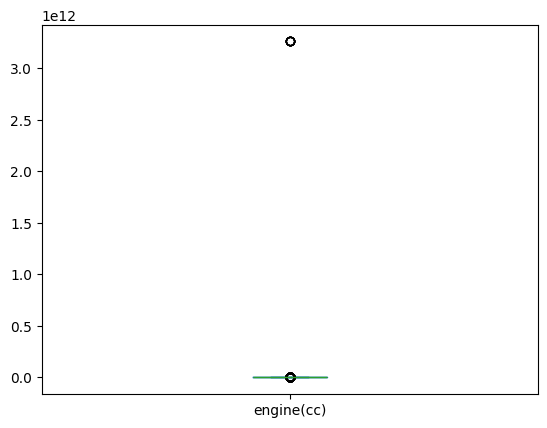

In [122]:
df['engine(cc)'].plot(kind='box')

In [123]:
mask2 = df['engine(cc)'] < 1e6
df = df[mask2]

<Axes: >

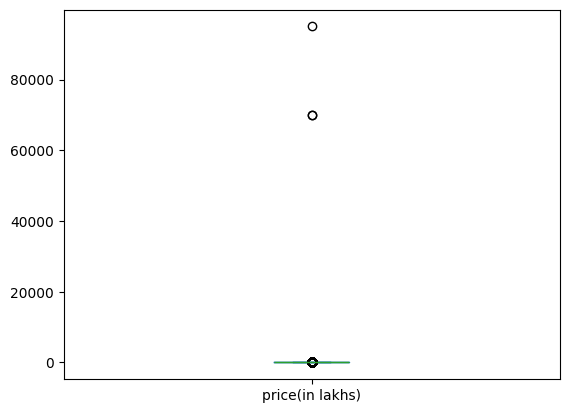

In [124]:
df['price(in lakhs)'].plot(kind='box')

In [125]:
mask3 = df['price(in lakhs)'] < 20_000
df = df[mask3]

In [126]:
y = df['price(in lakhs)']
X = df.drop(columns='price(in lakhs)')

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
X.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0


In [128]:
y.head()

,price(in lakhs)
0,63.75
1,8.99
2,23.75
3,13.56
4,24.00


# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [130]:
num_columns = X_train.select_dtypes(include='number').columns
cat_columns = X_train.select_dtypes(include='object').columns

In [131]:
num_transformer = Pipeline(
    [
        ('impute', SimpleImputer(strategy='mean'))
    ]
)
num_transformer

Pipeline(steps=[('impute', SimpleImputer())])

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [132]:
cat_transformer = Pipeline(
    [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]
)
cat_transformer

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [133]:
preprocessor = ColumnTransformer(
    [
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
    ]
)
preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])

In [134]:
# preprocessor.transform(X_train)

# Завдання 5
Створіть остаточну модель та натренуйте її

In [135]:
from sklearn.linear_model import LinearRegression


full_model = Pipeline(
    [
        ('prep', preprocessor),
        ('linear_regression', LinearRegression())
    ]
)

full_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])),
                ('linear_regression', LinearRegression())])

In [136]:
full_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  Index(['seats', 'kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['insurance_validity', 'fuel_type', 'manufacturing_year'], dtype='object'))])),
                ('linear_regression', LinearRegression())])

# Завдання 6
Виведіть основні метрики моделі

In [137]:
from sklearn import metrics


y_train_pred = full_model.predict(X_train)

metrics.r2_score(y_train_pred, y_train)

-0.9481748916921784

In [138]:
y_test_pred = full_model.predict(X_test)

metrics.r2_score(y_test_pred, y_test)

-0.008134490727279342

# Завдання 7
Збережіть модель

In [139]:
data = pd.DataFrame({'fuel_type': ['Petrol'],
                     'kms_driven': [80000],
                     'engine(cc)': [1832]})

data

,fuel_type,kms_driven,engine(cc)
0,Petrol,80000,1832


In [140]:
full_model.predict(data)


ValueError: columns are missing: {'mileage(kmpl)', 'insurance_validity', 'torque(Nm)', 'max_power(bhp)', 'seats', 'manufacturing_year'}

In [ ]:
X_train.head()